### Data Exploration

In this section, we describe the relevant columns of the dataset and their interpretation according to the business logic.

#### ID
- **Description**: A unique identifier for each customer or transaction.
- **Expected values**: A unique identifier in **string** format.

#### n_clicks
- **Description**: The number of clicks made by the user in the online store, indicating interest.
- **Expected range**: Positive values.
- **Justification**: Negative values do not make sense and should be corrected. Expected clicks range from 0 to 1000.

#### n_visitas
- **Description**: The number of visits to the online store by a customer.
- **Expected range**: Positive values.
- **Justification**: Negative values are invalid. Common values may range from 0 to 300 visits, depending on the customer.

#### monto_compras
- **Description**: The total amount spent by the customer in the store.
- **Expected range**: Positive values.
- **Justification**: Negative values should not exist. High values (more than 5000 monetary units) are exceptional but valid.

#### monto_descuentos
- **Description**: The total amount of discounts applied to the customer.
- **Expected range**: Positive values.
- **Justification**: Discounts cannot be negative. They are usually based on a percentage of the purchase.

#### dias_primera_compra
- **Description**: The number of days since the customer's first purchase.
- **Expected range**: Positive values.
- **Justification**: Negative values are not possible. A reasonable range would be from 0 to 500 days.

#### info_perfil
- **Description**: Classification of customers into profiles based on behavior or characteristics.
- **Expected range**: Integers between 100 and 350.
- **Justification**: Negative values are illogical and should be corrected. This field categorizes customers based on their behavior.

In [10]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

In [11]:
# Loading dataset
dataset_path = "../data/raw/dataset_ecommerce.csv"
df = pd.read_csv(dataset_path)

In [12]:
# Viewing data
print(df.head())
print(df.describe())

         ID  n_clicks  n_visitas  monto_compras  monto_descuentos  \
0  GGNEPpxo     198.0       44.0         3393.0              67.0   
1  tRA5byjK     303.0       74.0         3026.3              90.4   
2  vWxSsT0V     267.0       60.0         3490.2              80.5   
3  sxVV8jGL     177.0       85.0         3525.1              92.7   
4  YBs4XIN5     224.0       73.0         2980.9              72.6   

   dias_primera_compra  info_perfil  
0                241.0        235.0  
1                193.0        246.0  
2                111.0        220.0  
3                142.0        200.0  
4                227.0        109.0  
           n_clicks     n_visitas  monto_compras  monto_descuentos  \
count  55049.000000  55048.000000   55050.000000      55052.000000   
mean     408.723083     94.028702    1748.510134        448.956200   
std      175.677082     34.891261    1164.969753        503.152846   
min      -21.000000    -20.000000    -123.100000        -27.700000   
25%    

#### Cleaning Null Data
In this section, we will begin by analyzing and handling NaN values.

In [13]:
# Viewing NaN values
print("Total NaN values per column:")
print(df.isna().sum())

Total NaN values per column:
ID                     0
n_clicks               7
n_visitas              8
monto_compras          6
monto_descuentos       4
dias_primera_compra    1
info_perfil            9
dtype: int64


In [24]:
# Looking for NaN values in dataframe
df_with_nulls = df[df.isnull().any(axis=1)]
print(df_with_nulls)

             ID  n_clicks  n_visitas  monto_compras  monto_descuentos  \
575    fxADTnTp     302.0       72.0            NaN              72.9   
1794   2gf5Hlv4     320.0       48.0            NaN              88.3   
2355   DuIxWNRx     251.0       85.0         3218.3              82.8   
4461   m2qRM7GV     201.0       97.0         3290.1              99.0   
5213   xXneFmSB     213.0       49.0         4715.4              71.1   
12176  Aivyl6NW     295.0       53.0            NaN              67.5   
16540  3rLG6MOc     259.0       78.0         3554.5             106.1   
25421  6beOIYdL     455.0      127.0            NaN            1184.8   
28411  yZoZbhDU     708.0      159.0            NaN            1891.1   
29274  bdWwPeqZ     679.0      118.0         1153.9               NaN   
30243  nFR6Nb9u     651.0      126.0         1599.6               NaN   
31593  EmxKuekb     728.0      108.0         1767.4            1227.0   
35991  p3QEz4w8     531.0      140.0         1509.1

##### Looking for specific NaN values per column

In [15]:
# Looking NaN values in n_clicks column
df_with_nulls = df[df["n_clicks"].isnull()]
print(df_with_nulls)

             ID  n_clicks  n_visitas  monto_compras  monto_descuentos  \
5145   9gXNhlkr       NaN       84.0         2447.6              99.0   
17162  awa5cwh8       NaN       64.0         2939.2              64.6   
26692  VXX86e57       NaN       78.0         1841.5             943.9   
27951  44CtUXDA       NaN      137.0         1629.5            1467.6   
36739  2t43iRJl       NaN      104.0          344.9             108.8   
37424  qRwHB2FO       NaN       98.0          921.7             137.2   
40894  Y5v5Cfm5       NaN      119.0          656.3             147.7   

       dias_primera_compra  info_perfil  
5145                 126.0        236.0  
17162                192.0        160.0  
26692                138.0        182.0  
27951                134.0        178.0  
36739                237.0        175.0  
37424                234.0        214.0  
40894                232.0        153.0  


The NaN values in the `n_clicks` column represent errors according to the business logic. Since these clients are regular, the missing values can be reasonably replaced with the mean of the column. Therefore, they will be replaced with the mean.

In [23]:
# Replacing NaN n_clicks with the mean of n_clicks
df["n_clicks"] = df["n_clicks"].fillna(df["n_clicks"].mean())

In [25]:
# Looking NaN values in n_visitas column
df_with_nulls = df[df["n_visitas"].isnull()]
print(df_with_nulls)

Empty DataFrame
Columns: [ID, n_clicks, n_visitas, monto_compras, monto_descuentos, dias_primera_compra, info_perfil]
Index: []


For the NaN values in the `n_visitas` column, we will treat them in the same way as the `n_clicks` column, replacing the NaN values with the mean of the column. According to the business logic, these values represent the number of visits made by the client. Therefore, it is reasonable to replace these missing values with the column's mean, assuming that these clients are regular based on their data.

In [36]:
# Replacing NaN n_visitas with the mean of n_visitas
df["n_visitas"] = df["n_visitas"].fillna(df["n_visitas"].mean())

In [21]:
# Viewing NaN values
print("Total NaN values per column:")
print(df.isna().sum())

Total NaN values per column:
ID                     0
n_clicks               0
n_visitas              0
monto_compras          6
monto_descuentos       4
dias_primera_compra    1
info_perfil            9
dtype: int64


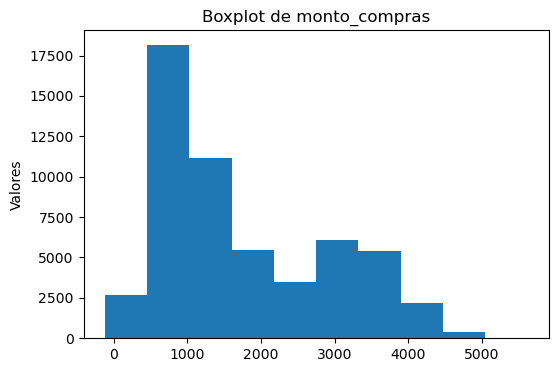

In [27]:
# Viewing distribution of monto_compras
plt.figure(figsize=(6, 4))
df["monto_compras"].plot(kind="hist")
plt.title("Boxplot de monto_compras")
plt.ylabel("Valores")
plt.show()

Esta distribución es asimétrica y presenta un pequeño sesgo a la derecha, reemplazar los valores NaN por la mediana sería lo adecuado frente a 

In [37]:
# Replacing Nan monto_compras with the median of monto_compras
df["monto_compras"] = df["monto_compras"].fillna(df["monto_compras"].median())

In [38]:
# Verifying replaced values
df_with_nulls = df[df.isnull().any(axis=1)]
print(df_with_nulls)

             ID  n_clicks  n_visitas  monto_compras  monto_descuentos  \
2355   DuIxWNRx     251.0       85.0         3218.3              82.8   
4461   m2qRM7GV     201.0       97.0         3290.1              99.0   
5213   xXneFmSB     213.0       49.0         4715.4              71.1   
16540  3rLG6MOc     259.0       78.0         3554.5             106.1   
29274  bdWwPeqZ     679.0      118.0         1153.9               NaN   
30243  nFR6Nb9u     651.0      126.0         1599.6               NaN   
31593  EmxKuekb     728.0      108.0         1767.4            1227.0   
35991  p3QEz4w8     531.0      140.0         1509.1             889.4   
41286  F5HDwZQl     300.0      119.0          639.5             157.1   
41763  u3uTwE4a     327.0       42.0          802.4               NaN   
43061  7eWUiBnp     506.0      101.0         1011.0             149.3   
47663  bKQWNgmS     451.0       63.0          614.9               NaN   
51891  vgPOW2B5     478.0       80.0          563.5